# 자물쇠와 열쇠

## 문제
잠겨있는 자물쇠는 격자 한 칸의 크기가 1 x 1인 N x N 크기의 정사각 격자 형태이고 특이한 모양의 열쇠는 M x M 크기인 정사각 격자 형태. 자물쇠에는 홈이 파여 있고 열쇠 또한 홈과 돌기 부분이 존재. 열쇠는 회전과 이동이 가능하며 열쇠의 돌기 부분을 자물쇠의 홈 부분에 딱 맞게 채우면 자물쇠가 열리게 되는 구조. 자물쇠 영역을 벗어난 부분에 있는 열쇠의 홈과 돌기는 자물쇠를 여는 데 영향을 주지 않지만, 자물쇠 영역 내에서는 열쇠의 돌기 부분과 자물쇠의 홈 부분이 정확히 일치해야 하며 열쇠의 돌기와 자물쇠의 돌기가 만나서는 안됨. 또한 자물쇠의 모든 홈을 채워 비어있는 곳이 없어야 자물쇠를 열 수 있음. 열쇠를 나타내는 2차원 배열 key와 자물쇠를 나타내는 2차원 배열 lock이 매개변수로 주어질 때, 열쇠로 자물쇠를 열수 있으면 true를, 열 수 없으면 false를 return
<br><br>
input : key = 2차원 정수 배열, lock = 2차원 정수 배열, output : boolean

#### <조건>
 - key는 M x M(3 ≤ M ≤ 20, M은 자연수)크기 2차원 배열
 - lock은 N x N(3 ≤ N ≤ 20, N은 자연수)크기 2차원 배열
 - M은 항상 N 이하
 - key와 lock의 원소는 0 또는 1로 이루어져 있음.
   - 0은 홈 부분, 1은 돌기 부분을 나타냄
   
#### <예시>
input : key = [[0, 0, 0], [1, 0, 0], [0, 1, 1]], lock = [[1, 1, 1], [1, 1, 0], [1, 0, 1]]	
<br><br>
result : true
<br><br>
 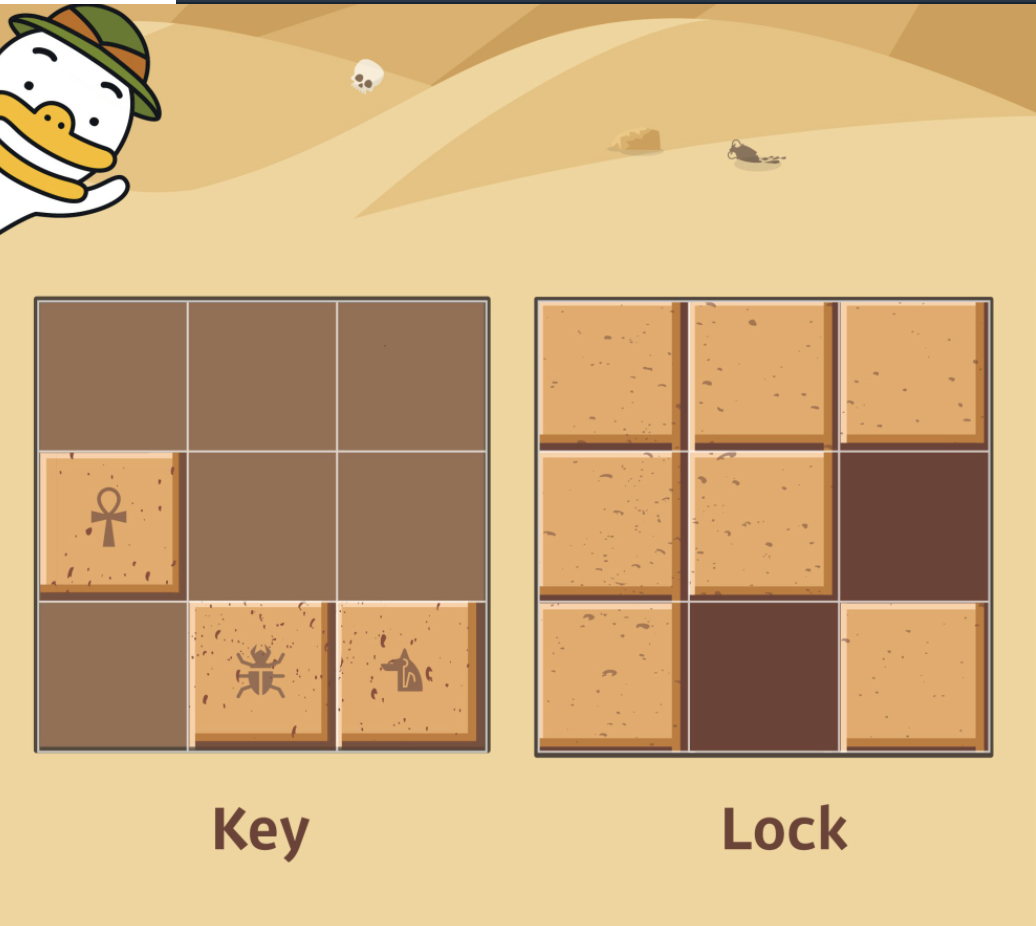
 
 - key를 시계 방향으로 90도 회전
 - 오른쪽으로 한 칸 이동
 - 아래로 한 칸 이동
 - lock의 홈 부분을 정확히 모두 채울 수 있음
 
https://programmers.co.kr/learn/courses/30/lessons/60059

## 풀이
 - lock의 범위를 확장시켜서 아래 그림과 같은 형태로 모든 인덱스를 탐색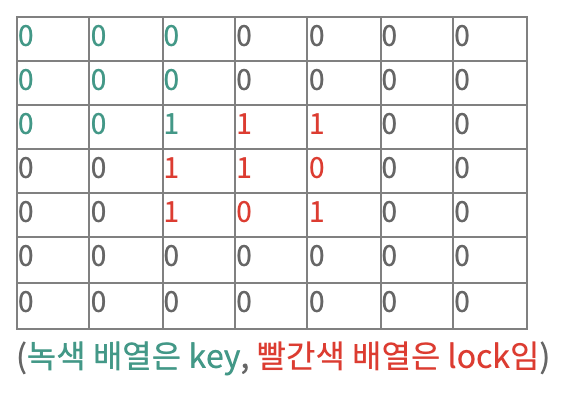
 - 위의 과정은 열쇠를 회전했을 때의 경우를 체크하는 것이기에, 회전했을 때도 고려해서 체크
 - key를 90도씩 회전시켜주는 rotation이라는 함수 생성
 - lock의 범위를 확장시킨 expend_lock에서 모든 인덱스를 체크할 필요는 없기에 범위를 정해서 체크해주는 함수인 check에 넘김
   - expend_lock을 초기에 모두 0으로 채워줌
   - expend_lock의 가운데에 기존의 lock 값을 넣어줌
   - 탐색하고자하는 expend_lock의 부분에서 key의 값들을 더해줌
   - expend_lock에서 가운데부분 (=기존의 lock을 채워넣은 부분)값이 모두 1인지 확인해서 1이 아닐 경우에는 False, 맞을 경우 True return
 - 위의 과정을 expend_lock의 모든 부분과 0도, 90도, 180도, 270도 총 4번 회전시켜서 확인해줌
   - 앞에서 말한 rotation을 이용해서 회전
 - 확인을 하는 과정에서 만약 한번이라도 True가 나오면 바로 True return
 - 모든 경우를 모두 확인해도 True가 없으면 False return

In [1]:
def solution(key, lock):
    for _ in range(4):
        for i in range(len(lock)+len(key)-1):
            for j in range(len(lock)+len(key)-1):
                if check(key, lock, i, j):
                    return True
                
        key = rotation(key)

    return False
        
def rotation(key):
    rot = [[0]*len(key) for _ in range(len(key))]
    
    for i in range(len(key)):
        for j in range(len(key)):
            rot[j][len(key)-1-i] = key[i][j]
            
    return rot


def check(key, lock, r, c):
    expend_lock = [[0]*((len(key)-1)*2+len(lock)) for _ in range((len(key)-1)*2+len(lock))]
    
    for i in range(len(lock)):
        for j in range(len(lock)):
            expend_lock[i+len(key)-1][j+len(key)-1] = lock[i][j]
            
    for i in range(len(key)):
        for j in range(len(key)):
            expend_lock[i+r][j+c] += key[i][j]
            
    for i in range(len(lock)):
        for j in range(len(lock)):
            if expend_lock[i+len(key)-1][j+len(key)-1] != 1:
                return False
            
    return True

In [2]:
key = [[0, 0, 0], [1, 0, 0], [0, 1, 1]]
lock = [[1, 1, 1], [1, 1, 0], [1, 0, 1]]

solution(key, lock)

True